# Reinforcement Learning: Multi-Armed Bandit

## Benchmark different policies to assess impact on average reward
In May 2020, I joined the [Machine Learning Tokyo](https://machinelearningtokyo.com/) study group on Reinforcement Learning.

This online RL series covered the book "Reinforcement learning: An introduction" by Richard Sutton and Andrew Barto.
One of the chapters was on the multi-armed Bandits problem.
This is like being in front of a multi-armed slot machine
Each action selection is like a play of one of the slot machine’s levers, and the rewards are the payoffs for hitting the jackpot. 
Through repeated action selections you are to maximize your winnings by concentrating your actions on the best levers.

In order to understand it properly, I decided to implement in python the pseudo codes from the book.
The idea was to compare the impact of different policies on the average reward.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn')

In [2]:
def average_rewards(n_experiments = 1000, # Set the number of experiments, default 1000
                    steps = 10000, # Set the number of steps, default 10000
                    k = 10, # Set the number of arms of the Multi-Armed bandit
                    optimistic = 0, # Set optimistic action values estimates at start up
                    epsilon = 0.1, # Set the proportion of exploration
                    alpha = None, # Set constant step-size parameter
                    beta = False,
                    stationary = True 
                    ):
    
    averages = np.zeros([steps]) # Initialize averages
    
    experiments_j = 0 # Initialize experiment count
    
    if alpha is None:
        for j in range(n_experiments):
            experiments_j += 1 # Update experiment index
            q_star = np.random.normal(0, 1, k) # Set actual action values
            step = np.zeros([k]) # Initialize step counter
            Q = np.zeros([k]) + optimistic # Initialize action values estimates
            avg=[] # Initialize average
            avg.append(0)
            
            for j in range(steps):
                exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
                index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
                step[index]+=1
                r=np.random.normal(q_star[index], 1) # Compute reward
                Q[index]= Q[index] + (r-Q[index])/step[index] # Update action values estimates
                r=avg[-1]+(r-avg[-1])/np.sum(step) # Update average reward
                avg.append(r)
                q_star=q_star+(1-stationary)*np.random.normal(0, 0.01, k)
            avg.pop(0)       
            averages = averages + (avg-averages)/experiments_j
    else:
        if not(beta):
            for j in range(n_experiments):
                experiments_j += 1 # Update experiment index
                q_star = np.random.normal(0, 1, k) # Set actual action values
                step = np.zeros([k]) # Initialize step counter
                Q = np.zeros([k]) + optimistic # Initialize action values estimates
                avg=[] # Initialize average
                avg.append(0)
                
                for j in range(steps):
                    exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
                    index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
                    step[index]+=1
                    r=np.random.normal(q_star[index], 1) # Compute reward
                    Q[index]= Q[index] + (r-Q[index])*alpha # Update action values estimates
                    r=avg[-1]+(r-avg[-1])/np.sum(step) # Update average reward
                    avg.append(r)
                    q_star=q_star+(1-stationary)*np.random.normal(0, 0.01, k)
                avg.pop(0)       
                averages = averages + (avg-averages)/experiments_j
        else:
            for j in range(n_experiments):
                experiments_j += 1 # Update experiment index
                q_star = np.random.normal(0, 1, k) # Set actual action values
                step = np.zeros([k]) # Initialize step counter
                Q = np.zeros([k]) + optimistic # Initialize action values estimates
                avg=[] # Initialize average
                avg.append(0)
                o=0
                
                for j in range(steps):
                    exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
                    index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
                    step[index]+=1
                    r=np.random.normal(q_star[index], 1) # Compute reward
                    o = o + alpha*(1-o)
                    beta_ = alpha/o
                    Q[index]= Q[index] + (r-Q[index])*beta_ # Update action values estimates
                    r=avg[-1]+(r-avg[-1])/np.sum(step) # Update average reward
                    avg.append(r)
                    q_star=q_star+(1-stationary)*np.random.normal(0, 0.01, k)
                avg.pop(0)       
                averages = averages + (avg-averages)/experiments_j
        
    return averages

## Description of the policies tested:
### Random
Playing randomly

### Greedy: 
Systematically playing the current best value action

### Epsilon Greedy: 
Same as the greedy policy but epsilon fraction of the time play randomly to explore for better actions,

### Optimistic Greedy: 
same as greedy policy but you start with very optimistic value estimates to explore all actions.


In [3]:
# Compute the results for several policies:
# Random play
averages_random = average_rewards(epsilon=1)

# Greedy policy: systematically playing the current best value action, 
averages_greedy = average_rewards(epsilon=0)

# Epsilon greedy policy: same as the greedy policy but epsilon fraction of the time play randomly to explore for better actions,
averages_epsilon_greedy = average_rewards(epsilon=0.1)

# Average optimisitc greedy: same as greedy policy but you start with very optimistic value estimates to explore all actions,
averages_optimistic_greedy = average_rewards(epsilon=0, optimistic=5)

# Random play non stationary
averages_random_not_stationary = average_rewards(epsilon = 1, stationary =False)

# Greedy policy: systematically playing the current best value action non stationary
averages_greedy_not_stationary = average_rewards(epsilon = 0, stationary =False)

# Epsilon greedy policy: same as the greedy policy but epsilon fraction of the time play randomly to explore for better actions, non stationary
averages_epsilon_greedy_not_stationary = average_rewards(epsilon = 0.1, stationary =False)

# Average optimisitc greedy: same as greedy policy but you start with very optimistic value estimates to explore all actions, non stationary
averages_optimistic_greedy_not_stationary = average_rewards(epsilon = 0, optimistic = 5, stationary =False)

# Random play non stationary with alpha
averages_random_not_stationary_alpha = average_rewards(epsilon = 1, stationary =False, alpha = 0.1)

# Greedy policy: systematically playing the current best value action non stationary with alpha
averages_greedy_not_stationary_alpha = average_rewards(epsilon = 0, stationary =False, alpha = 0.1)

# Epsilon greedy policy: same as the greedy policy but epsilon fraction of the time play randomly to explore for better actions, non stationary with alpha
averages_epsilon_greedy_not_stationary_alpha = average_rewards(epsilon = 0.1, stationary =False, alpha = 0.1)

# Average optimisitc greedy: same as greedy policy but you start with very optimistic value estimates to explore all actions, non stationary with alpha
averages_optimistic_greedy_not_stationary_alpha = average_rewards(epsilon = 0, optimistic = 5, stationary =False, alpha = 0.1)

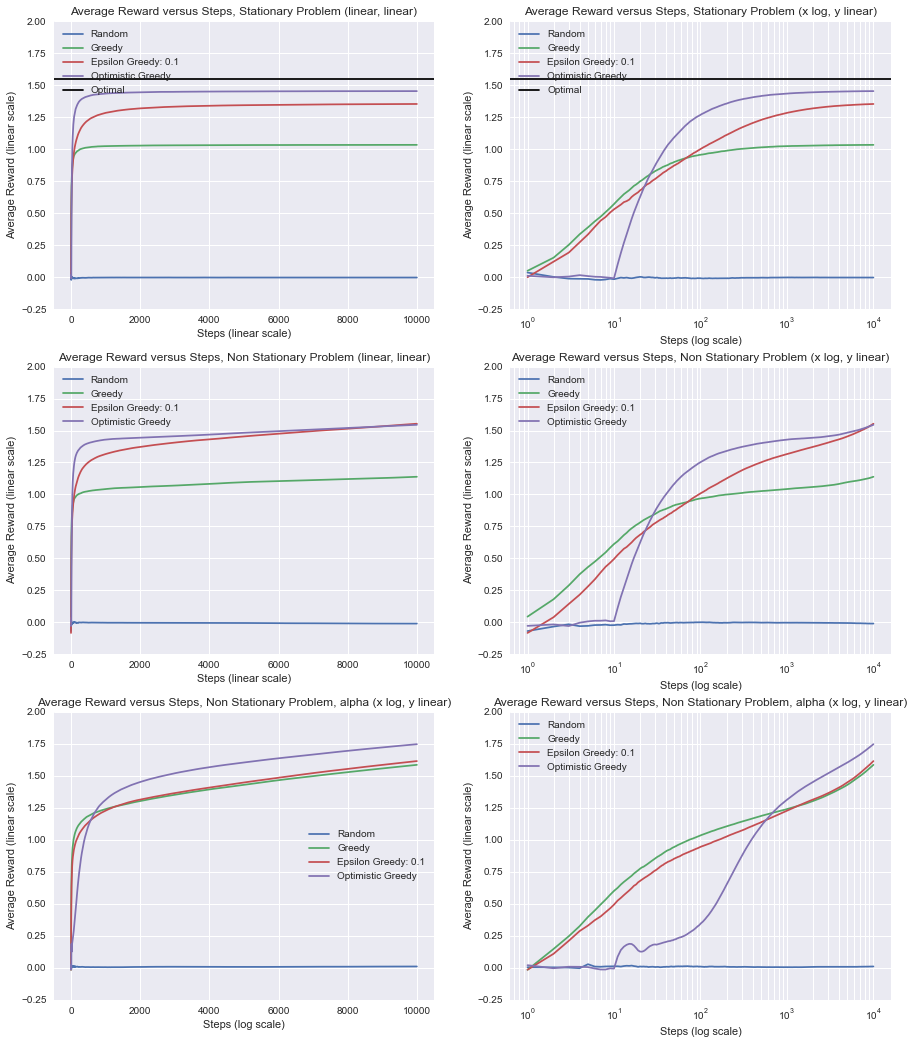

In [7]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(15,18));
ax1.set_title("Average Reward versus Steps, Stationary Problem (linear, linear)");  
ax1.set_xlabel("Steps (linear scale)");
ax1.set_ylabel("Average Reward (linear scale)");
ax1.grid(visible=True, which='both');

ax2.set_xscale('log');
ax2.set_title("Average Reward versus Steps, Stationary Problem (x log, y linear)");
ax2.set_xlabel("Steps (log scale)");
ax2.set_ylabel("Average Reward (linear scale)");
ax2.grid(visible=True, which='both');

ax3.set_title("Average Reward versus Steps, Non Stationary Problem (linear, linear)");  
ax3.set_xlabel("Steps (linear scale)");
ax3.set_ylabel("Average Reward (linear scale)");
ax3.grid(visible=True, which='both');

ax4.set_xscale('log');
ax4.set_title("Average Reward versus Steps, Non Stationary Problem (x log, y linear)");
ax4.set_xlabel("Steps (log scale)");
ax4.set_ylabel("Average Reward (linear scale)");
ax4.grid(visible=True, which='both');

ax5.set_title("Average Reward versus Steps, Non Stationary Problem, alpha (x log, y linear)");
ax5.set_xlabel("Steps (log scale)");
ax5.set_ylabel("Average Reward (linear scale)");
ax5.grid(visible=True, which='both');

ax6.set_xscale('log');
ax6.set_title("Average Reward versus Steps, Non Stationary Problem, alpha (x log, y linear)");
ax6.set_xlabel("Steps (log scale)");
ax6.set_ylabel("Average Reward (linear scale)");
ax6.grid(visible=True, which='both');

ax1.plot(range(1,len(averages_random)+1),averages_random, label='Random');
ax1.plot(range(1,len(averages_greedy)+1),averages_greedy, label='Greedy');
ax1.plot(range(1,len(averages_epsilon_greedy)+1),averages_epsilon_greedy, label='Epsilon Greedy: 0.1');
ax1.plot(range(1,len(averages_optimistic_greedy)+1),averages_optimistic_greedy, label='Optimistic Greedy');
ax1.axhline(1.55, c="black", label='Optimal')

ax2.plot(range(1,len(averages_random)+1),averages_random, label='Random');
ax2.plot(range(1,len(averages_greedy)+1),averages_greedy, label='Greedy');
ax2.plot(range(1,len(averages_epsilon_greedy)+1),averages_epsilon_greedy, label='Epsilon Greedy: 0.1');
ax2.plot(range(1,len(averages_optimistic_greedy)+1),averages_optimistic_greedy, label='Optimistic Greedy');
ax2.axhline(1.55, c="black", label='Optimal')

ax3.plot(range(1,len(averages_random_not_stationary)+1),averages_random_not_stationary, label='Random');
ax3.plot(range(1,len(averages_greedy_not_stationary)+1),averages_greedy_not_stationary, label='Greedy');
ax3.plot(range(1,len(averages_epsilon_greedy_not_stationary)+1),averages_epsilon_greedy_not_stationary, label='Epsilon Greedy: 0.1');
ax3.plot(range(1,len(averages_optimistic_greedy_not_stationary)+1),averages_optimistic_greedy_not_stationary, label='Optimistic Greedy');

ax4.plot(range(1,len(averages_random_not_stationary)+1),averages_random_not_stationary, label='Random');
ax4.plot(range(1,len(averages_greedy_not_stationary)+1),averages_greedy_not_stationary, label='Greedy');
ax4.plot(range(1,len(averages_epsilon_greedy_not_stationary)+1),averages_epsilon_greedy_not_stationary, label='Epsilon Greedy: 0.1');
ax4.plot(range(1,len(averages_optimistic_greedy_not_stationary)+1),averages_optimistic_greedy_not_stationary, label='Optimistic Greedy');

ax5.plot(range(1,len(averages_random_not_stationary_alpha)+1),averages_random_not_stationary_alpha, label='Random');
ax5.plot(range(1,len(averages_greedy_not_stationary_alpha)+1),averages_greedy_not_stationary_alpha, label='Greedy');
ax5.plot(range(1,len(averages_epsilon_greedy_not_stationary_alpha)+1),averages_epsilon_greedy_not_stationary_alpha, label='Epsilon Greedy: 0.1');
ax5.plot(range(1,len(averages_optimistic_greedy_not_stationary_alpha)+1),averages_optimistic_greedy_not_stationary_alpha, label='Optimistic Greedy');

ax6.plot(range(1,len(averages_random_not_stationary_alpha)+1),averages_random_not_stationary_alpha, label='Random');
ax6.plot(range(1,len(averages_greedy_not_stationary_alpha)+1),averages_greedy_not_stationary_alpha, label='Greedy');
ax6.plot(range(1,len(averages_epsilon_greedy_not_stationary_alpha)+1),averages_epsilon_greedy_not_stationary_alpha, label='Epsilon Greedy: 0.1');
ax6.plot(range(1,len(averages_optimistic_greedy_not_stationary_alpha)+1),averages_optimistic_greedy_not_stationary_alpha, label='Optimistic Greedy');

ax1.legend();
ax2.legend();
ax3.legend();
ax4.legend();
ax5.legend();
ax6.legend();

ax1.set_ylim(bottom=-0.25, top=2);
ax2.set_ylim(bottom=-0.25, top=2);
ax3.set_ylim(bottom=-0.25, top=2);
ax4.set_ylim(bottom=-0.25, top=2);
ax5.set_ylim(bottom=-0.25, top=2);
ax6.set_ylim(bottom=-0.25, top=2);

## Conclusions and Way Forward
Among the policies tested, the optimistic greedy gave the best results on the stationary problem.

The next steps would be to test thoses policies on non stationary problems and on problems where the state changes as a result of the actions.